In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('data/data.csv')
%matplotlib inline

In [3]:
print("Shape::",df.shape)

Shape:: (7043, 21)


In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
#checking for missing values in the dataset
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
#Converting 'TotalCharges' to numeric
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')
df.dropna(subset=['TotalCharges'],inplace=True)

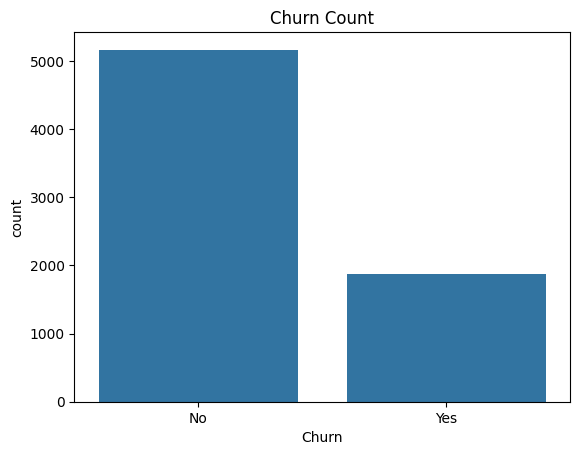

In [10]:
#Visualizations
sns.countplot(data=df,x="Churn")
plt.title("Churn Count")
plt.show()

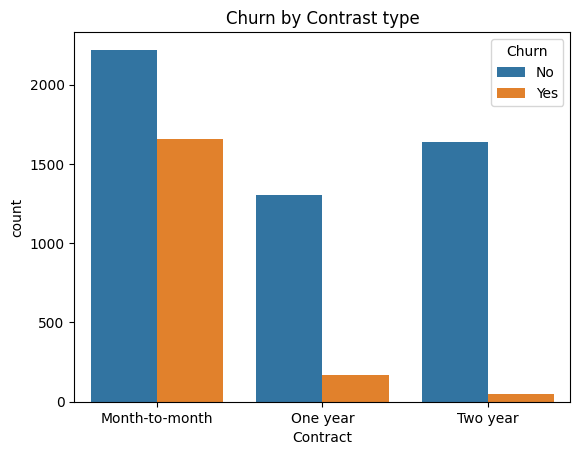

In [11]:
sns.countplot(data=df,x='Contract',hue='Churn')
plt.title("Churn by Contrast type")
plt.show()

In [12]:
df.drop(['customerID'],axis=1,inplace=True)

In [13]:
binary_cols=['Partner','Dependents','PhoneService','PaperlessBilling','Churn']

for col in binary_cols:
    df[col]=df[col].map({'Yes':1,'No':0})
df=pd.get_dummies(df,drop_first=True)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
num_cols=['tenure','MonthlyCharges','TotalCharges']
df[num_cols]=scaler.fit_transform(df[num_cols])

In [16]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Male,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,-1.280248,0,1,-1.161694,-0.994194,0,False,...,False,False,False,False,False,False,False,False,True,False
1,0,0,0,0.064303,1,0,-0.260878,-0.173740,0,True,...,False,False,False,False,False,True,False,False,False,True
2,0,0,0,-1.239504,1,1,-0.363923,-0.959649,1,True,...,False,False,False,False,False,False,False,False,False,True
3,0,0,0,0.512486,0,0,-0.747850,-0.195248,0,True,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,-1.239504,1,1,0.196178,-0.940457,1,False,...,False,False,False,False,False,False,False,False,True,False


In [18]:
from sklearn.model_selection import train_test_split
X=df.drop('Churn',axis=1)
y=df['Churn']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
model=LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [21]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7867803837953091
[[915 118]
 [182 192]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [24]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

Accuracy: 0.7739872068230277

Confusion Matrix:
 [[903 130]
 [188 186]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85      1033
           1       0.59      0.50      0.54       374

    accuracy                           0.77      1407
   macro avg       0.71      0.69      0.69      1407
weighted avg       0.76      0.77      0.77      1407



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [08:06:11] WARNING: /private/var/folders/yq/wp_dphf9569398vr9m06jslh0000gn/T/pip-install-ck65gb1o/xgboost_6d609b3763fc4322a3b30d30ed583836/cpp_src/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [25]:
scale_pos_weight = (number of class 0 samples) / (number of class 1 samples)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (682663459.py, line 1)

In [26]:
scale_pos_weight = 1033 / 374

In [27]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(
    eval_metric='logloss',
    random_state=42,
    scale_pos_weight=1033 / 374  # Balancing class weights
)

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = xgb_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7398720682302772

Confusion Matrix:
 [[789 244]
 [122 252]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.76      0.81      1033
           1       0.51      0.67      0.58       374

    accuracy                           0.74      1407
   macro avg       0.69      0.72      0.70      1407
weighted avg       0.77      0.74      0.75      1407



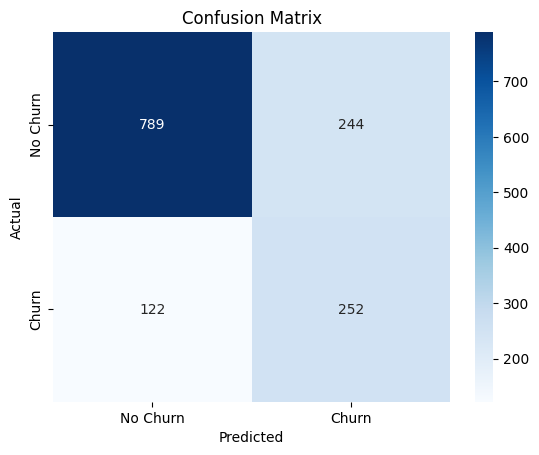

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

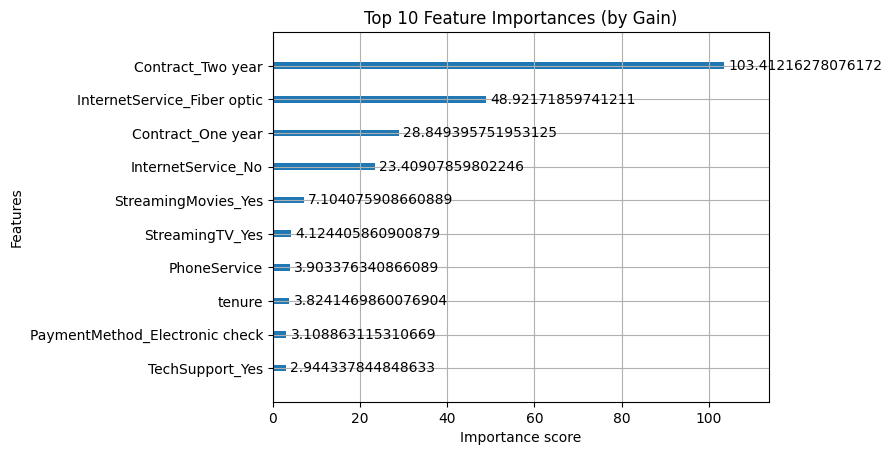

In [30]:
xgb.plot_importance(xgb_model, max_num_features=10, importance_type='gain')
plt.title("Top 10 Feature Importances (by Gain)")
plt.show()

In [32]:
xgb_model.save_model("xgb_bank_churn_model.json")

In [34]:
#class imbalance ratio
class_imbalance_ratio = y_train.value_counts()[0] / y_train.value_counts()[1]

In [35]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
    'scale_pos_weight': [class_imbalance_ratio]
}

# Create the classifier
xgb_clf = xgb.XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42)

# Setup GridSearch
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, 
                           scoring='f1', cv=3, verbose=1, n_jobs=-1)

# Fit on training data
grid_search.fit(X_train, y_train)

# Best parameters and estimator
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Fitting 3 folds for each of 72 candidates, totalling 216 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:20:52] WARNING: /private/var/folders/yq/wp_dphf9569398vr9m06jslh0000gn/T/pip-install-ck65gb1o/xgboost_6d609b3763fc4322a3b30d30ed583836/cpp_src/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:20:52] WARNING: /private/var/folders/yq/wp_dphf9569398vr9m06jslh0000gn/T/pip-install-ck65gb1o/xgboost_6d609b3763fc4322a3b30d30ed583836/cpp_src/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:20:52] WARNING: /private/var/folders/yq/wp_dphf9569398vr9m06jslh0000gn/T/pip-install-ck65gb1o/xgboost_6d609b3763fc43

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 100, 'scale_pos_weight': np.float64(2.762541806020067), 'subsample': 0.8}


In [36]:
# Predictions
y_pred_best = best_model.predict(X_test)

# Metrics
print("Tuned Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))

Tuned Model Accuracy: 0.7356076759061834
Confusion Matrix:
 [[750 283]
 [ 89 285]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.73      0.80      1033
           1       0.50      0.76      0.61       374

    accuracy                           0.74      1407
   macro avg       0.70      0.74      0.70      1407
weighted avg       0.79      0.74      0.75      1407



In [39]:
#Trying to improve the precision
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# 2. Train XGBoost on the resampled data
xgb_resampled = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgb_resampled.fit(X_resampled, y_resampled)

# 3. Predict on test set
y_pred_resampled = xgb_resampled.predict(X_test)

# 4. Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred_resampled))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_resampled))
print("\nClassification Report:\n", classification_report(y_test, y_pred_resampled))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:23:24] WARNING: /private/var/folders/yq/wp_dphf9569398vr9m06jslh0000gn/T/pip-install-ck65gb1o/xgboost_6d609b3763fc4322a3b30d30ed583836/cpp_src/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.7533759772565742

Confusion Matrix:
 [[824 209]
 [138 236]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.80      0.83      1033
           1       0.53      0.63      0.58       374

    accuracy                           0.75      1407
   macro avg       0.69      0.71      0.70      1407
weighted avg       0.77      0.75      0.76      1407



In [41]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to training data
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

In [42]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
    'scale_pos_weight': [1]  # Since we used SMOTE, class imbalance is handled
}

# Create the model
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Apply Grid Search on resampled training data
grid_search = GridSearchCV(estimator=xgb_clf,
                           param_grid=param_grid,
                           scoring='f1_macro',
                           cv=3,
                           verbose=1,
                           n_jobs=-1)

# Fit the model
grid_search.fit(X_train_resampled, y_train_resampled)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Predict and evaluate
y_pred_best = grid_search.best_estimator_.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))

Fitting 3 folds for each of 48 candidates, totalling 144 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:24:53] WARNING: /private/var/folders/yq/wp_dphf9569398vr9m06jslh0000gn/T/pip-install-ck65gb1o/xgboost_6d609b3763fc4322a3b30d30ed583836/cpp_src/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:24:53] WARNING: /private/var/folders/yq/wp_dphf9569398vr9m06jslh0000gn/T/pip-install-ck65gb1o/xgboost_6d609b3763fc4322a3b30d30ed583836/cpp_src/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:24:53] WARNING: /private/var/folders/yq/wp_dphf9569398vr9m06jslh0000gn/T/pip-install-ck65gb1o/xgboost_6d609b3763fc43

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'scale_pos_weight': 1, 'subsample': 0.8}
Accuracy: 0.7526652452025586

Confusion Matrix:
 [[827 206]
 [142 232]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.80      0.83      1033
           1       0.53      0.62      0.57       374

    accuracy                           0.75      1407
   macro avg       0.69      0.71      0.70      1407
weighted avg       0.77      0.75      0.76      1407



In [43]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek(random_state=42)
X_res, y_res = smt.fit_resample(X_train, y_train)

In [44]:
y_proba = best_model.predict_proba(X_test)[:, 1]
# Try thresholds like 0.4, 0.3...
y_pred = (y_proba > 0.4).astype(int)

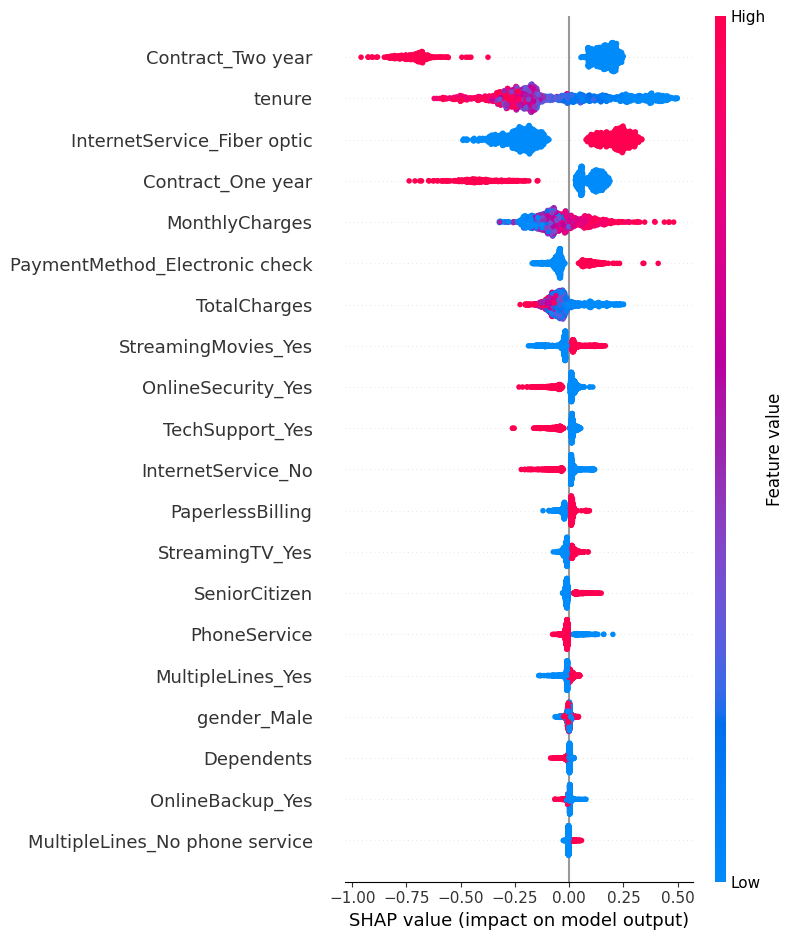

In [48]:
import shap
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [46]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.6/547.6 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.2/26.2 MB 23.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [shap]4/5 [shap]]te]


In [49]:
import shap

# Pick one test instance (e.g., first one)
index = 0
data_for_prediction = X_test.iloc[index]
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)

# Recalculate SHAP values for that instance
explainer = shap.TreeExplainer(best_model)
shap_values_single = explainer.shap_values(data_for_prediction_array)

# Display force plot
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values_single, data_for_prediction_array, feature_names=X_test.columns)

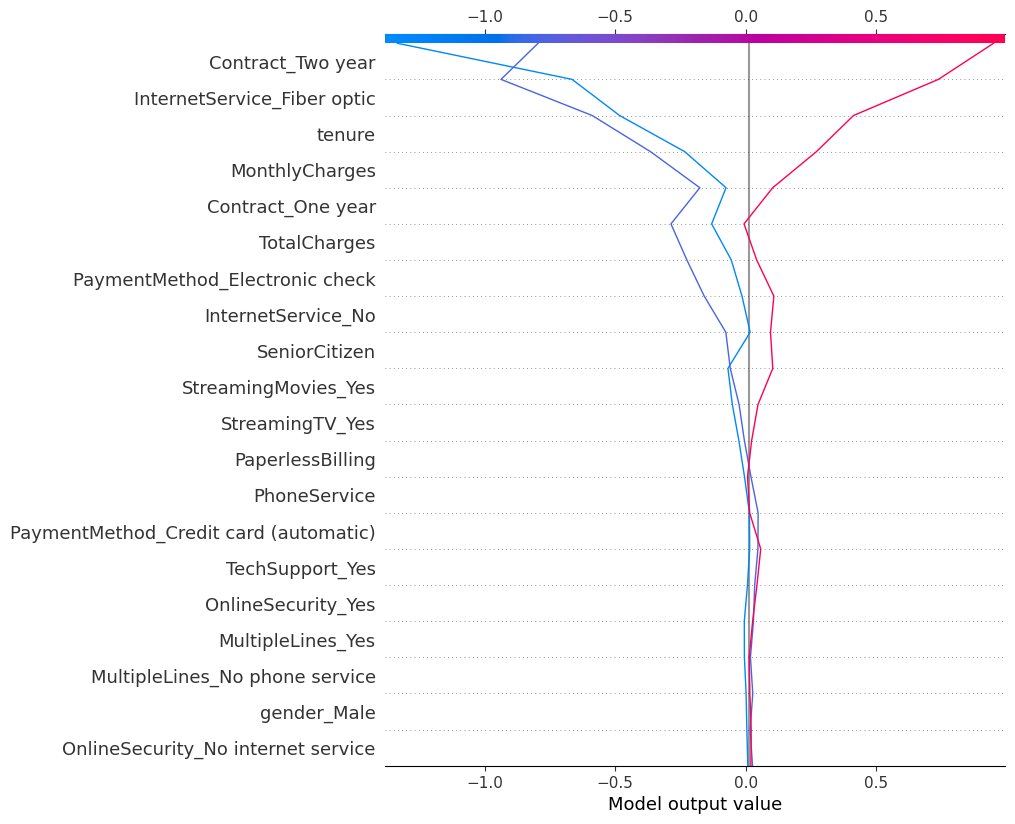

In [50]:
sample_idx = [0, 1, 2]  # adjust to your liking
shap_values = explainer.shap_values(X_test.iloc[sample_idx])

shap.decision_plot(explainer.expected_value, shap_values, X_test.iloc[sample_idx])

In [51]:
import joblib

# Save model
joblib.dump(best_model, 'xgb_churn_model.pkl')

# To load it later
# best_model = joblib.load('xgb_churn_model.pkl')

['xgb_churn_model.pkl']

In [52]:
# Compute SHAP values for entire test set
shap_values = explainer.shap_values(X_test)

# Convert to DataFrame
shap_df = pd.DataFrame(shap_values, columns=X_test.columns)

# Save to CSV
shap_df.to_csv('shap_values.csv', index=False)

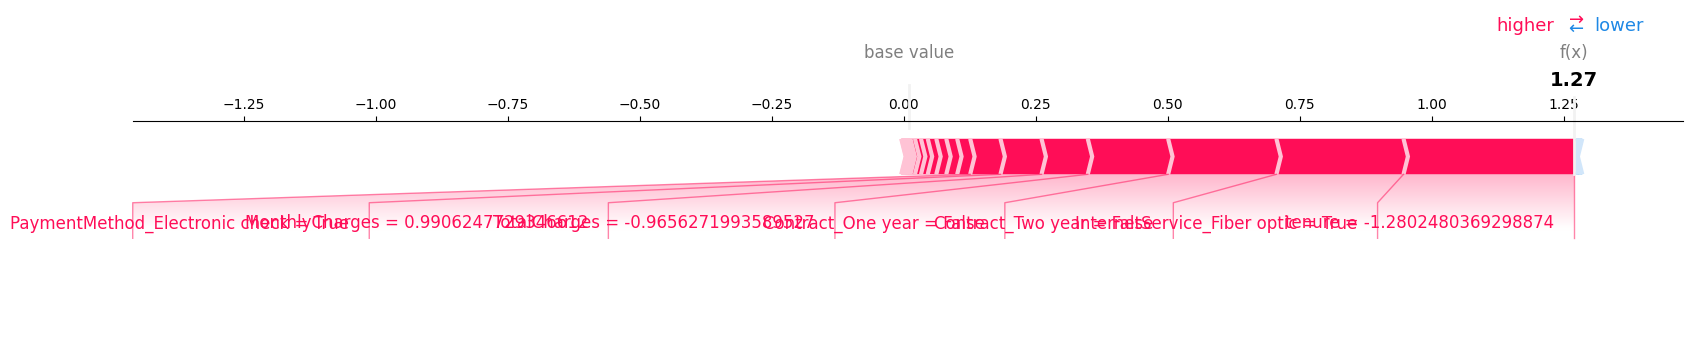

None

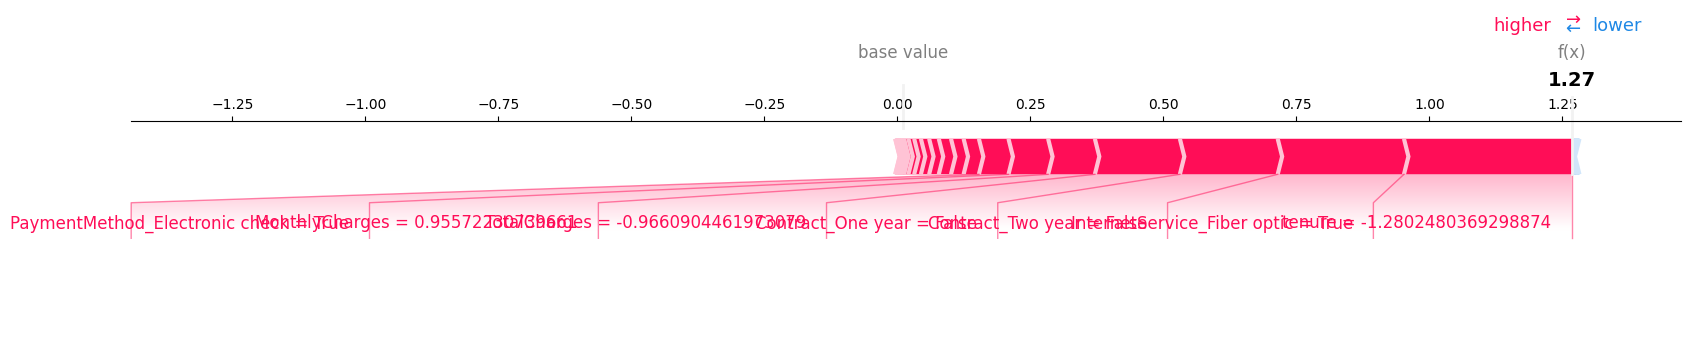

None

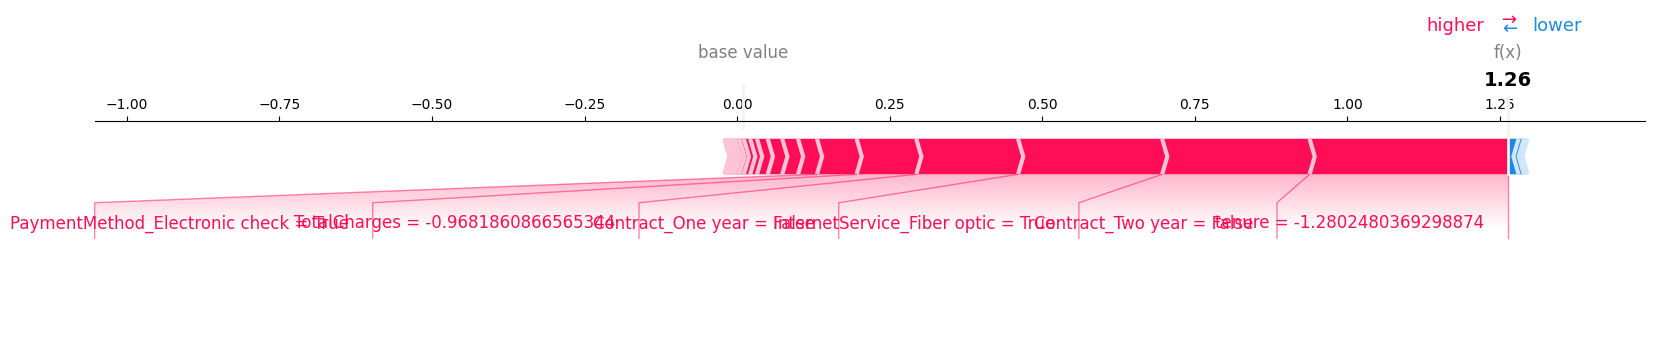

None

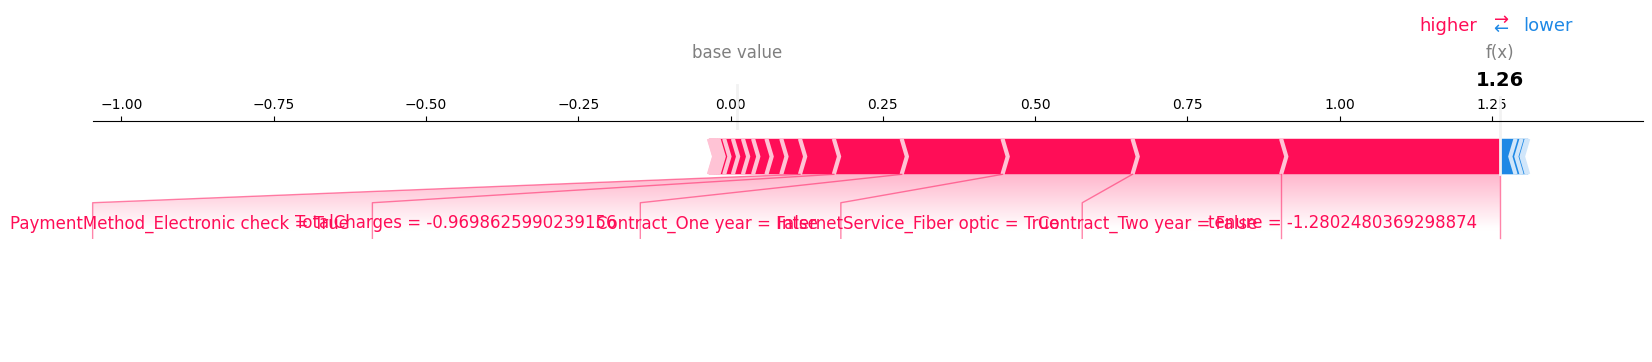

None

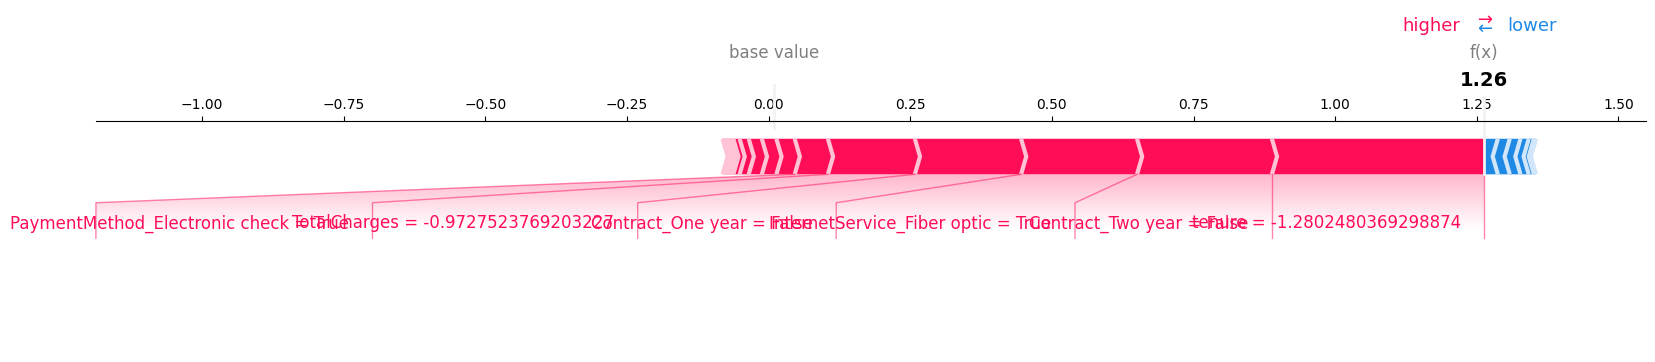

None

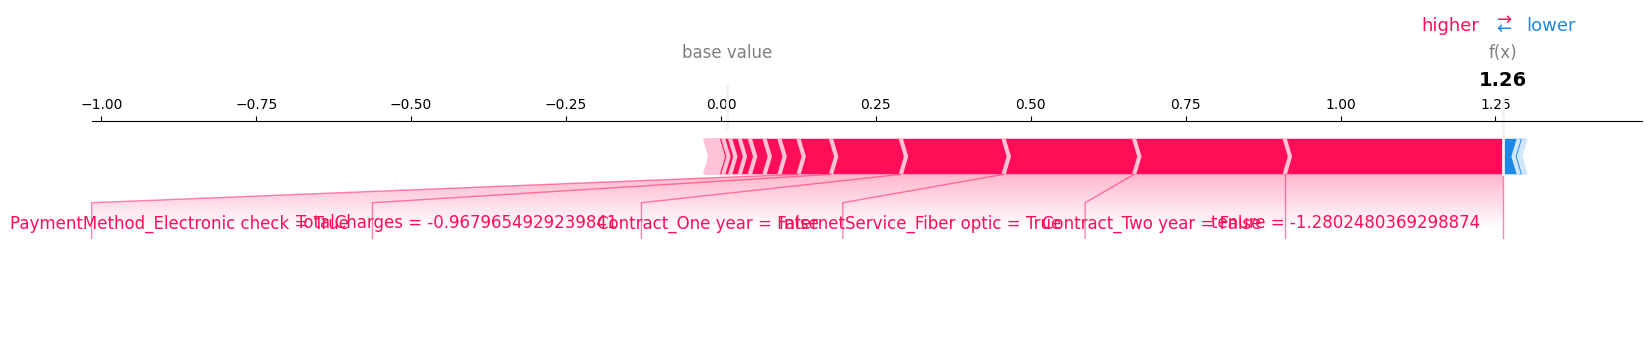

None

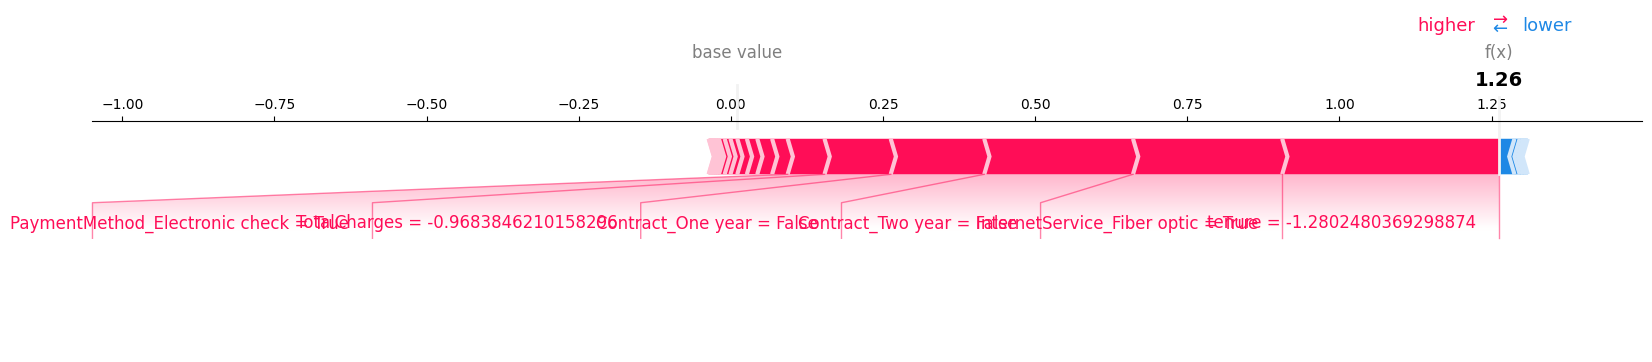

None

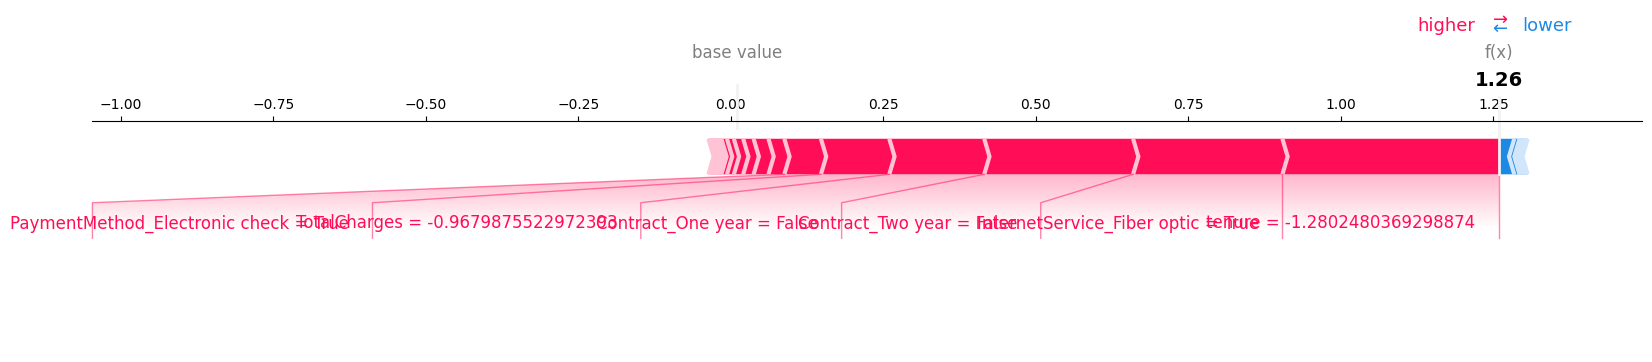

None

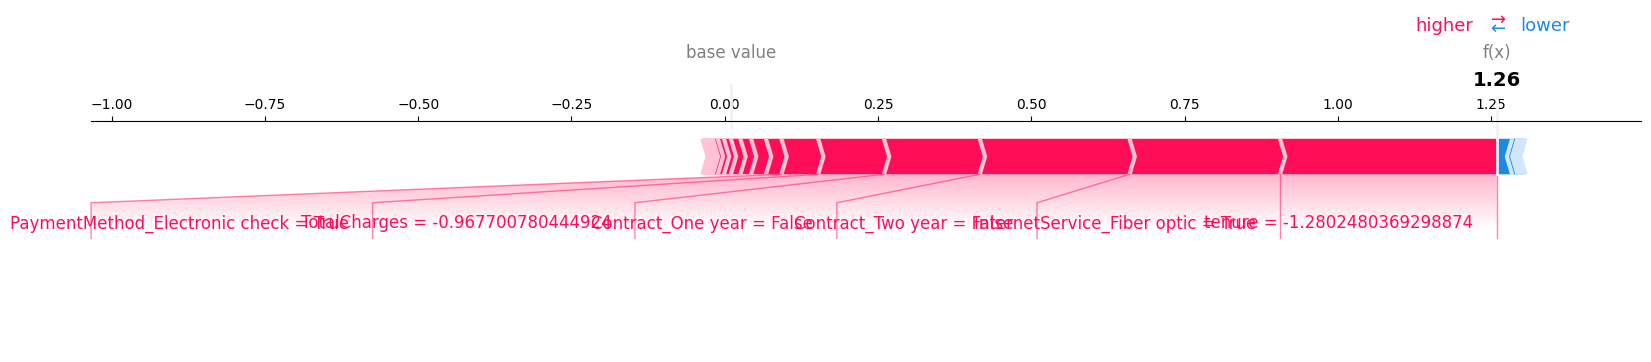

None

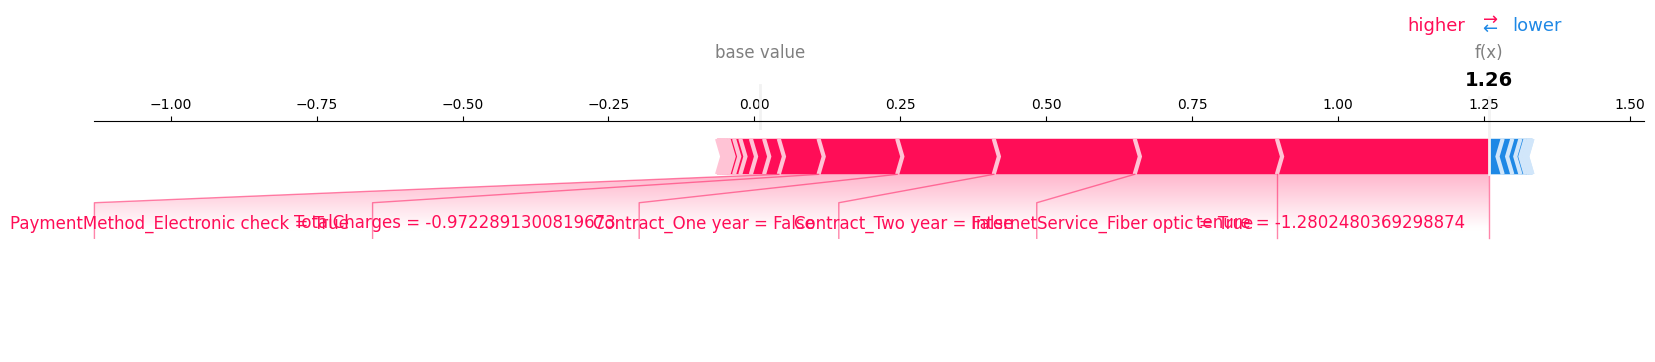

None

In [53]:
# Predict churn probabilities
y_proba = best_model.predict_proba(X_test)[:, 1]

# Top 10 customers most likely to churn
top_indices = y_proba.argsort()[-10:][::-1]

for idx in top_indices:
    display(shap.force_plot(explainer.expected_value, 
                            explainer.shap_values(X_test.iloc[idx:idx+1]),
                            X_test.iloc[idx:idx+1],
                            matplotlib=True))

In [58]:
import streamlit as st
import pandas as pd
import joblib
import shap
import matplotlib.pyplot as plt

# Load model
model = joblib.load("xgb_churn_model.pkl")

# Load data
data = pd.read_csv("data/data.csv")  # Preprocessed test data
X = data.drop("Churn", axis=1) if "Churn" in data.columns else data

# SHAP explainer
explainer = shap.TreeExplainer(model)

# Streamlit UI
st.title("📊 Customer Churn Risk Dashboard")

customer_id = st.selectbox("Select customer index", X.index)

if st.button("Predict and Explain"):
    customer = X.loc[[customer_id]]
    prediction = model.predict(customer)[0]
    probability = model.predict_proba(customer)[0][1]
    
    st.markdown(f"**Prediction:** {'Churn' if prediction == 1 else 'Not Churn'}")
    st.markdown(f"**Probability of Churn:** {probability:.2f}")

    # SHAP Force Plot
    shap_values = explainer.shap_values(customer)
    st.set_option('deprecation.showPyplotGlobalUse', False)
    shap.force_plot(explainer.expected_value, shap_values, customer, matplotlib=True, show=False)
    st.pyplot(bbox_inches='tight')

    # SHAP Summary Bar
    st.markdown("### 🔍 Feature Impact Summary")
    shap.summary_plot(shap_values, customer, plot_type="bar", show=False)
    st.pyplot(bbox_inches='tight')

2025-06-21 10:45:36.712 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-21 10:45:36.736 
  command:

    streamlit run /Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/ipykernel_launcher.py [ARGUMENTS]
2025-06-21 10:45:36.737 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-21 10:45:36.737 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-21 10:45:36.737 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-21 10:45:36.737 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-21 10:45:36.739 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-21

In [60]:
import pandas as pd

df = pd.read_csv("data/data.csv")
df.drop("customerID", axis=1, inplace=True)

# Handle missing or invalid values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

# Encode categorical variables
df_encoded = pd.get_dummies(df)

df_encoded.to_csv("data/encoded_data.csv", index=False)


In [63]:
# In app.py or Jupyter preprocessing:
from sklearn.preprocessing import OneHotEncoder

raw_data = pd.read_csv("data/data.csv")
raw_data = raw_data.drop(['customerID'], axis=1)

# Convert TotalCharges
raw_data['TotalCharges'] = pd.to_numeric(raw_data['TotalCharges'], errors='coerce')
raw_data.dropna(inplace=True)

# Separate features and label
y = raw_data['Churn'].map({'Yes': 1, 'No': 0})
X_raw = raw_data.drop("Churn", axis=1)

# One-hot encode using OneHotEncoder to ensure same columns during training and prediction
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(X_raw)
encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(X_raw.columns))

# Save for Streamlit
encoded_df.to_csv("data/encoded_data.csv", index=False)

# Save encoder if needed
joblib.dump(encoder, "encoder.pkl")


['encoder.pkl']